In [83]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
import cv2 as cv

# Load picture, convert to grayscale and detect edges
image_path = 'generate_output/speech_balloons/teste_General_speech_0.26.png'

def get_ellipse(image_path, accuracy = 40, threshold = 20, min_size = 100, max_size = 120):
    image_rgb = cv.imread(image_path)
    # print image info
    print(image_rgb.shape)
    print(image_rgb.dtype)
    plt.imshow(image_rgb)
    image_gray = color.rgb2gray(image_rgb)
    edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

    # Perform a Hough Transform
    # The accuracy corresponds to the bin size of the histogram for minor axis lengths.
    # A higher `accuracy` value will lead to more ellipses being found, at the
    # cost of a lower precision on the minor axis length estimation.
    # A higher `threshold` will lead to less ellipses being found, filtering out those
    # with fewer edge points (as found above by the Canny detector) on their perimeter.
    result = hough_ellipse(edges, accuracy=accuracy, threshold=threshold, min_size=min_size, max_size=max_size)
    print(result)
    result.sort(order='accumulator')

    # Estimated parameters for the ellipse
    best = list(result[-1])
    yc, xc, a, b = (int(round(x)) for x in best[1:5])
    orientation = best[5]

    # Draw the ellipse on the original image
    cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
    #draw the ellipse on the image if the ellipse is found
    for cy_point, cx_point in zip(cy, cx):
        if cy_point < image_rgb.shape[0] and cx_point < image_rgb.shape[1]:
            image_rgb[cy_point, cx_point] = [0, 255, 0]

    # Draw the edge (white) and the resulting ellipse (red)
    edges = color.gray2rgb(img_as_ubyte(edges))
    for cy_point, cx_point in zip(cy, cx):
        if cy_point < edges.shape[0] and cx_point < edges.shape[1]:
            edges[cy_point, cx_point] = [250, 0, 0]

    fig2, (ax1, ax2) = plt.subplots(
        ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True
    )

    ax1.set_title('Original picture')
    ax1.imshow(image_rgb)

    ax2.set_title('Edge (white) and result (red)')
    ax2.imshow(edges)

    plt.show()

(175, 319, 3)
uint8
[( 95,   1., 105. ,  96. , 105.83005244, 1.57079633)
 (100,   1., 105.5,  95.5, 105.83005244, 1.57079633)
 (100,   1., 106. ,  95. , 105.83005244, 1.57079633) ...
 ( 34, 173., 196. , 110. ,  97.97958971, 1.57079633)
 ( 28, 173., 203. , 103. ,  97.97958971, 1.57079633)
 ( 38, 173., 255. ,  51. , 113.13708499, 1.57079633)]


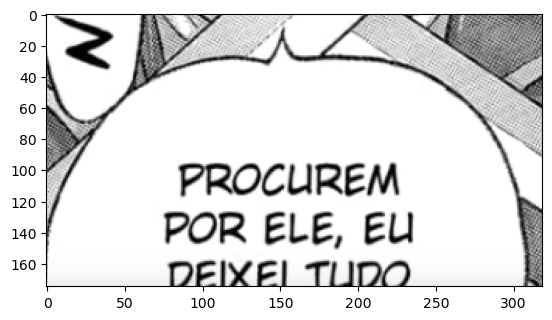

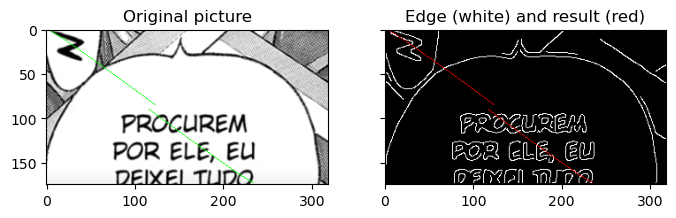

In [92]:
image_path = 'generate_output/speech_balloons/teste_narration speech_0.39.png'
get_ellipse(image_path)

(207, 305, 3)
uint8
[(203,   1. , 151. , 130.        ,  97.97958971, 1.57079633)
 (201,   1. , 153.5, 132.5       ,  97.97958971, 1.57079633)
 (213,   1.5, 150.5,  97.97958971, 130.50095785, 3.13776125) ...
 ( 44, 189.5, 103.5,  50.81830379, 113.13708499, 1.7990701 )
 ( 47, 189.5, 104. ,  50.33140173, 113.13708499, 1.80131817)
 ( 43, 190. , 104. ,  50.21951812, 113.13708499, 1.7916251 )]


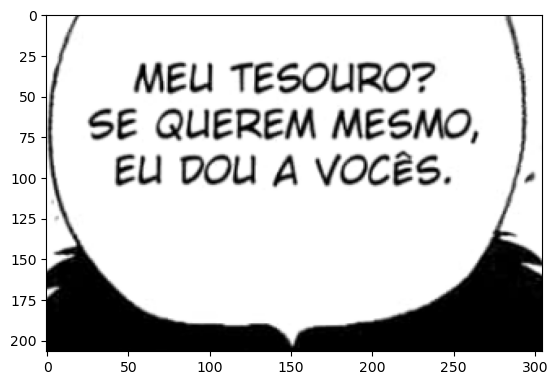

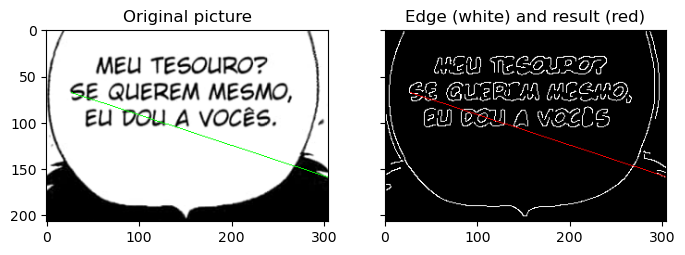

In [89]:
image_path = 'generate_output/speech_balloons/teste_General_speech_0.26.png'
get_ellipse(image_path)

(113, 140, 3)
uint8
[(21,  8. , 64.5,  51.5       , 105.83005244, 1.57079633)
 (22,  8. , 64.5,  53.5       , 105.83005244, 1.57079633)
 (21,  8. , 65. ,  53.        , 105.83005244, 1.57079633)
 (22,  8. , 65.5,  53.5       , 105.83005244, 1.57079633)
 (22,  8. , 65. ,  55.        , 105.83005244, 1.57079633)
 (21,  8. , 65.5,  54.5       , 105.83005244, 1.57079633)
 (22,  8. , 65.5,  55.5       , 105.83005244, 1.57079633)
 (21,  8. , 66. ,  55.        , 105.83005244, 1.57079633)
 (22,  8. , 65.5,  56.5       , 105.83005244, 1.57079633)
 (21,  8. , 66.5,  55.5       , 105.83005244, 1.57079633)
 (22,  8. , 65.5,  57.5       , 105.83005244, 1.57079633)
 (21,  8. , 66. ,  57.        , 105.83005244, 1.57079633)
 (21,  8. , 66.5,  56.5       , 105.83005244, 1.57079633)
 (21,  8. , 65.5,  58.5       , 105.83005244, 1.57079633)
 (21,  8. , 66. ,  58.        , 105.83005244, 1.57079633)
 (22,  8. , 66.5,  57.5       , 105.83005244, 1.57079633)
 (22,  8. , 65.5,  59.5       , 105.83005244, 1.5707

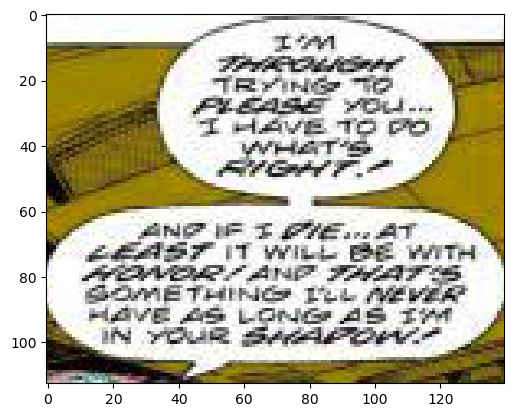

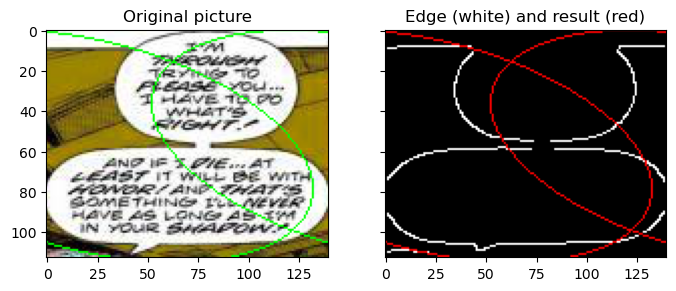

In [90]:
image_path = 'generate_output/speech_balloons/0024_jpg.rf.b619f9f798192862474116b42016c495_General_speech_0.92.png'
get_ellipse(image_path)

(148, 117, 3)
uint8
[(21,  8. , 58.5, 113.13708499, 50.98284025, 3.00385646)
 (22,  8.5, 58.5, 113.13708499, 50.91659847, 3.01358359)
 (21,  8. , 59. , 113.13708499, 50.48762225, 3.00249671) ...
 (27, 69.5, 98. , 113.13708499, 69.37759004, 1.7300209 )
 (24, 70. , 98. , 113.13708499, 68.8839604 , 1.73117177)
 (25, 69.5, 98.5, 113.13708499, 69.30007215, 1.72289711)]


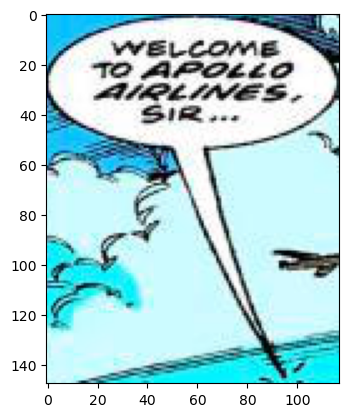

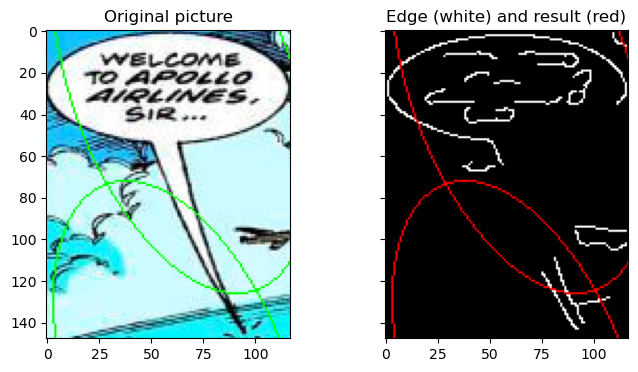

In [91]:
image_path = 'generate_output/speech_balloons/0013_jpg.rf.dafb9a53c10562fe0de93b01bced2b45_General_speech_0.87.png'
get_ellipse(image_path)